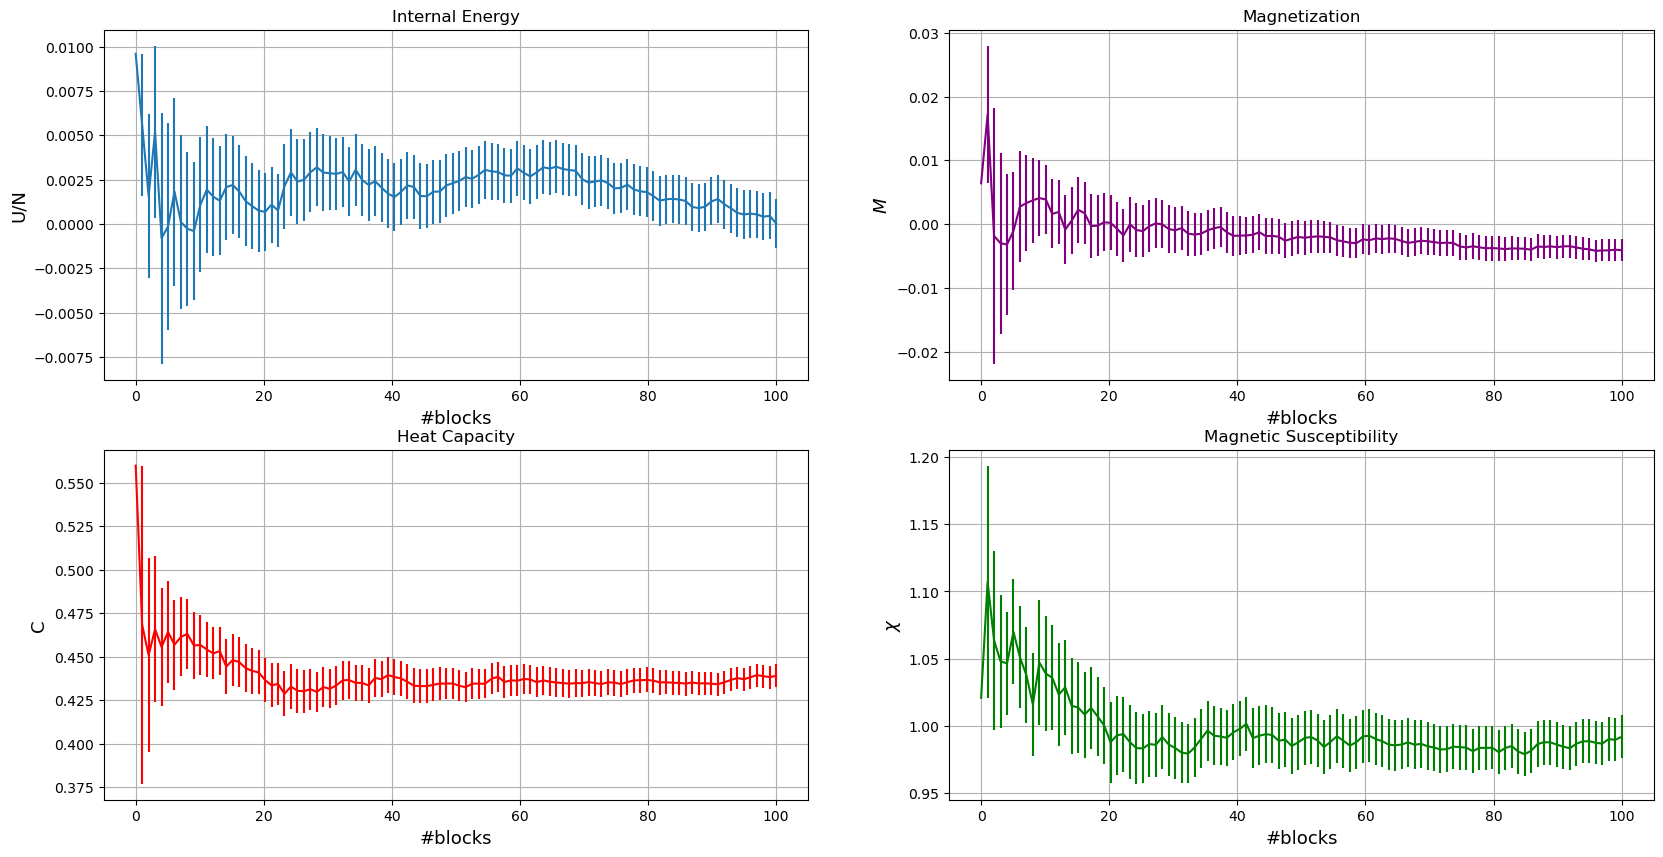

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

(Ene, errEne) = np.loadtxt('output.ene.0',  usecols = (2, 3), unpack = True)
(Heat, errHeat) = np.loadtxt('output.heat.0', usecols = (2, 3), unpack = True)
(Mag, errMag) = np.loadtxt('output.mag.0', usecols = (2, 3), unpack = True)
(Chi, errChi) = np.loadtxt('output.chi.0', usecols = (2, 3), unpack=True)

x=np.linspace(0, len(Heat), len(Heat))

fig, axs = plt.subplots(2, 2, figsize=(20,10))
plt.title('Equilibration, T=2', fontsize=20)

axs[0,0].errorbar(x, Ene, yerr=errEne)
axs[0,0].set_ylabel('U/N', fontsize=13)
axs[0,0].set_title('Internal Energy')

axs[1,0].errorbar(x, Heat, yerr=errHeat, color='red')
axs[1,0].set_ylabel('C', fontsize=13)
axs[1,0].set_title('Heat Capacity')

axs[0,1].errorbar(x, Mag, yerr=errMag, color='purple')
axs[0,1].set_ylabel('$M$', fontsize=13)
axs[0,1].set_title('Magnetization')

axs[1,1].errorbar(x, Chi, yerr=errChi, color='green')
axs[1,1].set_ylabel('$\chi$', fontsize=13)
axs[1,1].set_title('Magnetic Susceptibility')

for ax in axs.flat:
    ax.set_xlabel('#blocks', fontsize=13)
    ax.grid()

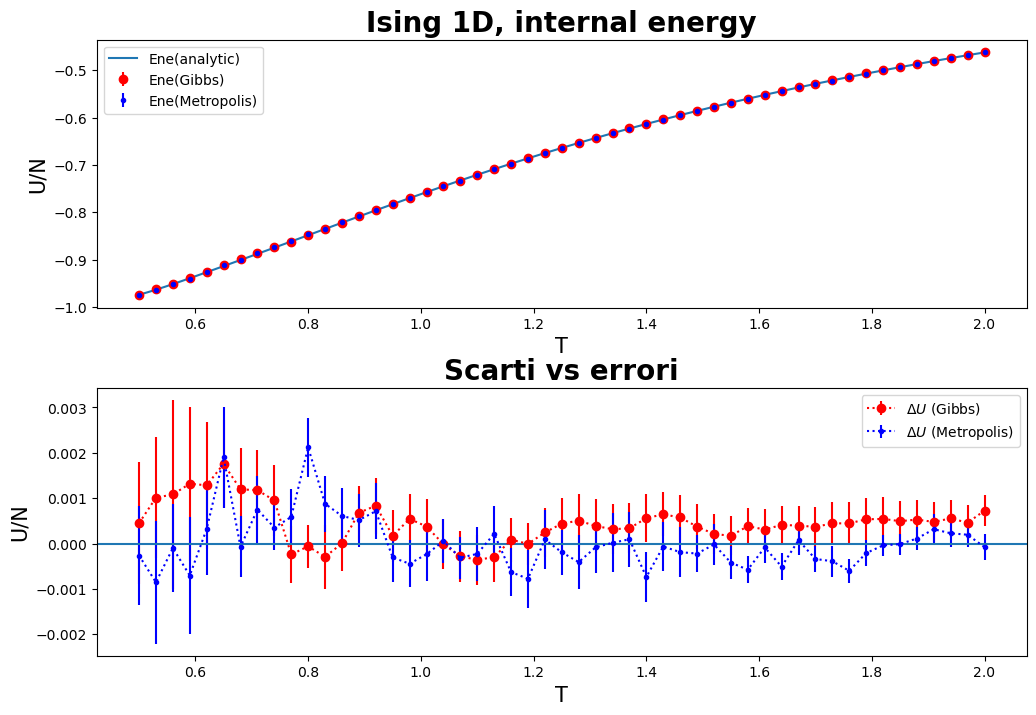

In [59]:
points = 100
T = np.linspace(0.5, 2.0, num = points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th ** Ns
ch = 1 / th
e = -J * (th + ch * thN) / (1 + thN)

plt.figure(figsize = (12,8))

plt.subplot(2,1,1)
plt.plot(T, e, label = "Ene(analytic)")
plt.title('Ising 1D, internal energy', fontsize = 20, fontweight = "bold")
plt.ylabel('U/N',  fontsize = 15)
plt.xlabel('T',  fontsize = 15)
temp, ave_fin, err = np.loadtxt("../Data/06.1_gibbs_0_ene.dat", usecols = (0, 1, 2), delimiter = ' ', unpack = 'true')
plt.errorbar(temp, ave_fin, yerr = err, marker = 'o', linestyle = "none", label = "Ene(Gibbs)", color = "r")
temp, ave_fin_m, err_m = np.loadtxt("../Data/06.1_metro_0_ene.dat", usecols = (0, 1, 2), delimiter = ' ', unpack = 'true')
plt.errorbar(temp, ave_fin_m, yerr = err_m, marker = '.', linestyle = "none", label = "Ene(Metropolis)", color = "b")
plt.legend()

#----------------------

th_d = np.tanh(J/temp)
thN_d = th_d ** Ns
ch_d = 1 / th_d
e_d = -J * (th_d + ch_d * thN_d) / (1 + thN_d)

plt.subplot(2, 1, 2)
plt.errorbar(temp, ave_fin - e_d, yerr = err, marker = 'o', linestyle = "dotted", label = "$\Delta U$ (Gibbs)", color = "r")
plt.errorbar(temp, ave_fin_m - e_d, yerr = err_m, marker = '.', linestyle = "dotted", label = "$\Delta U$ (Metropolis)", color = "b") # +0.01 per vedere sotto
plt.title("Scarti vs errori", fontsize = 20, fontweight = "bold")
plt.ylabel('U/N',  fontsize = 15)
plt.xlabel('T',  fontsize = 15)
plt.legend()
plt.axhline(y = 0)
plt.subplots_adjust(hspace = 0.3)

plt.show()

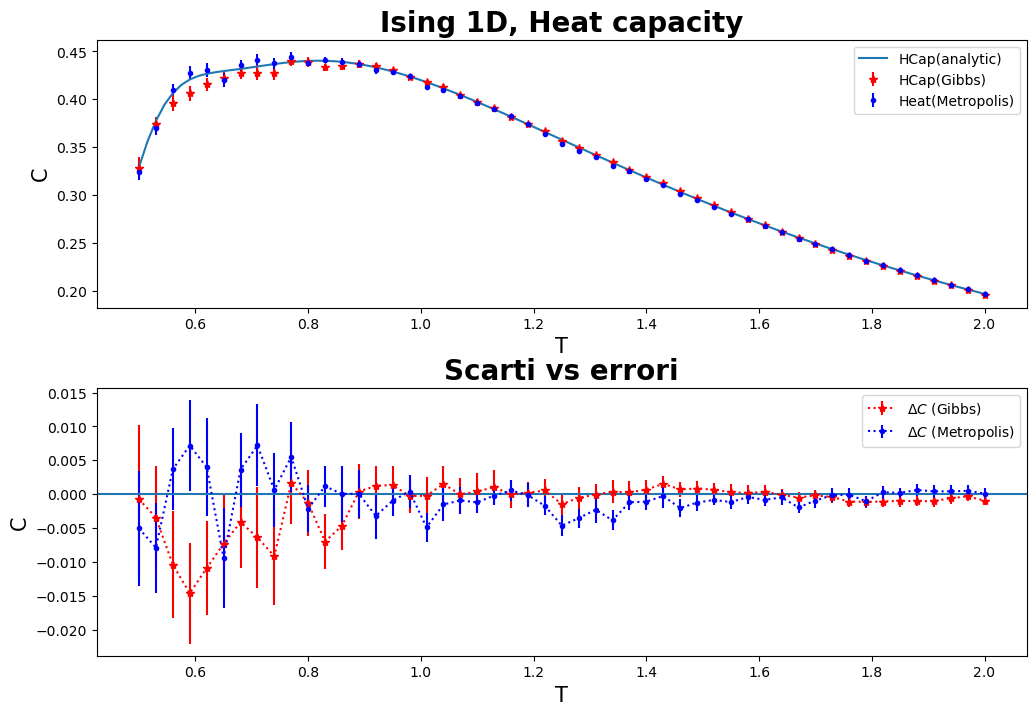

In [60]:
plt.figure(figsize = (12,8))

plt.subplot(2,1,1)
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat, label = "HCap(analytic)")
plt.title('Ising 1D, Heat capacity', fontsize = 20, fontweight = "bold")
plt.xlabel('T',  fontsize = 15)
plt.ylabel('C',  fontsize = 15)
temp, ave_fin, err = np.loadtxt("../Data/06.1_gibbs_0_heat.dat", usecols=(0,1,2), delimiter=' ', unpack='true') 
plt.errorbar(temp, ave_fin, yerr = err, marker='*', linestyle="none", label="HCap(Gibbs)", color = "r")
temp, ave_fin_m, err_m = np.loadtxt("../Data/06.1_metro_0_heat.dat", usecols=(0,1,2), delimiter=' ', unpack='true') 
plt.errorbar(temp, ave_fin_m, yerr = err_m, marker='.', linestyle="none", label="Heat(Metropolis)", color = "b")
plt.legend()

# ========== errors ==============

th_d = np.tanh(J/temp)
thN_d= th_d**Ns
ch_d = 1/th_d
heat_d=((1/temp*J)**2)*(((1+thN_d+(Ns-1)*(th_d**2)+(Ns-1)*(ch_d**2)*thN_d)/(1+thN_d))-Ns*((th_d+ch_d*thN_d)/(1+thN_d))**2)

plt.subplot(2,1,2)
plt.errorbar(temp, ave_fin-heat_d, yerr = err, marker='*', linestyle = "dotted", label="$\Delta C$ (Gibbs)", color = "r") 
plt.errorbar(temp, ave_fin_m-heat_d, yerr = err_m, marker='.', linestyle = "dotted", label="$\Delta C$ (Metropolis)", color = "b")
plt.title("Scarti vs errori", fontsize = 20, fontweight = "bold")
plt.xlabel('T',  fontsize = 15)
plt.ylabel('C',  fontsize = 15)
plt.axhline(y=0)
plt.legend()

plt.subplots_adjust(hspace=0.3)

plt.show()



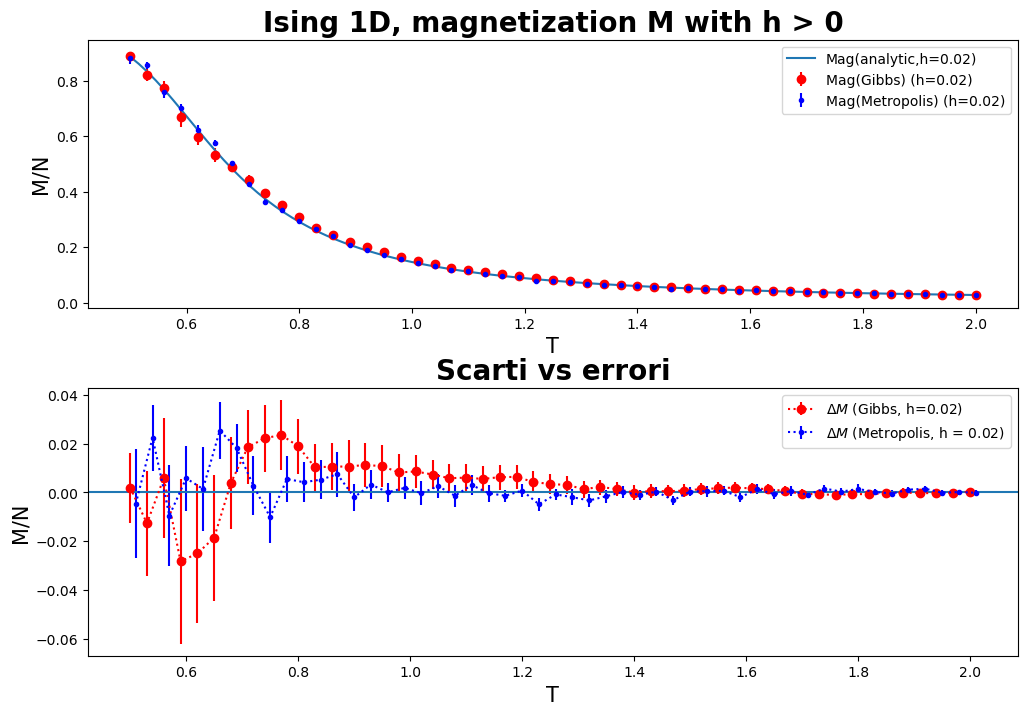

In [61]:
plt.figure(figsize = (12,8))

plt.subplot(2,1,1)

# =========== h=0.02 ===============

h=0.02 #external field
b = 1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M, label = "Mag(analytic,h=0.02)")
plt.title('Ising 1D, magnetization M with h > 0', fontsize = 20, fontweight = "bold")
plt.ylabel('M/N',  fontsize = 15)
plt.xlabel('T',  fontsize = 15)
temp, ave_fin, err = np.loadtxt("../Data/06.1_gibbs_0.02_mag.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(temp, ave_fin, yerr = err, marker='o', linestyle="none", label="Mag(Gibbs) (h=0.02)", color = "r")
temp, ave_fin_m, err_m = np.loadtxt("../Data/06.1_metro_0.02_mag.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(temp, ave_fin_m, yerr = err_m, marker='.', linestyle="none", label="Mag(Metropolis) (h=0.02)", color = "b")
plt.legend()

# =========== errors (h=0.02) ==============

plt.subplot(2,1,2)

th_d = np.tanh(J/temp)
thN_d= th_d**Ns
ch_d = 1/th_d
h=0.02 
b = 1/temp
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M_d = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

plt.errorbar(temp, ave_fin-M_d, yerr = err, marker='o', linestyle = "dotted", label="$\Delta M$ (Gibbs, h=0.02)", color = "r")
plt.errorbar(temp+0.01, ave_fin_m-M_d, yerr = err_m, marker='.', linestyle = "dotted", label="$\Delta M$ (Metropolis, h = 0.02)", color = "b") # +0.01 per vedere sotto
plt.title("Scarti vs errori", fontsize = 20, fontweight = "bold")
plt.ylabel('M/N',  fontsize = 15)
plt.xlabel('T',  fontsize = 15)
plt.axhline(y=0)
plt.legend()

plt.subplots_adjust(hspace=0.3)

plt.show()

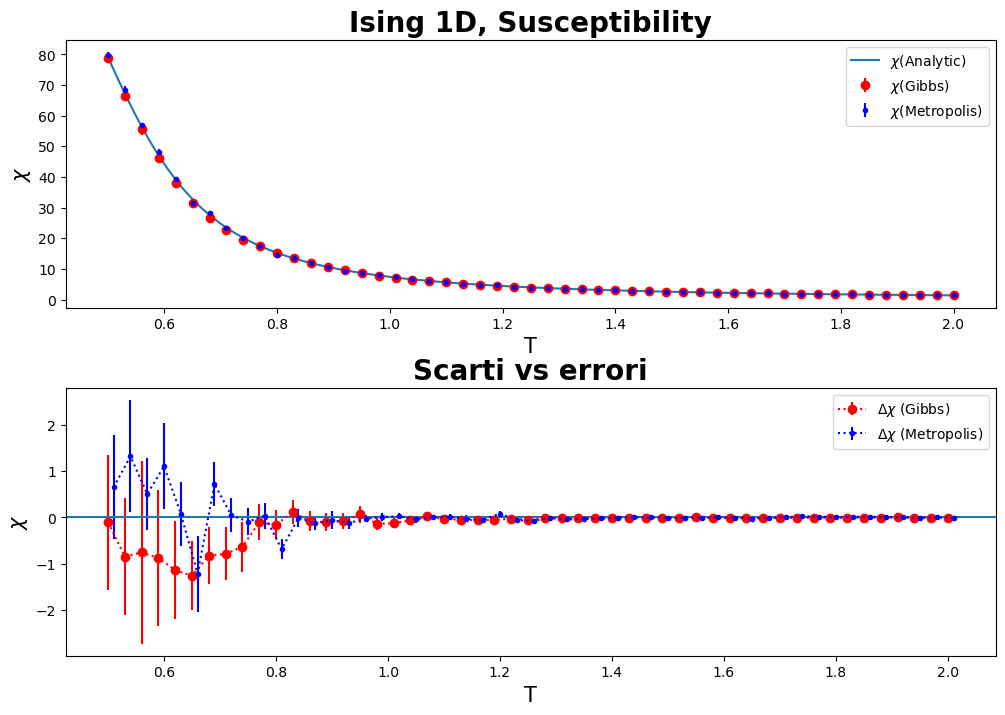

In [62]:
plt.figure(figsize = (12,8))

plt.subplot(2,1,1)

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X, label = "$\chi$(Analytic)")
plt.title('Ising 1D, Susceptibility', fontsize = 20, fontweight = "bold")
plt.ylabel('$\chi$',  fontsize = 15)
plt.xlabel('T',  fontsize = 15)
temp, ave_fin, err = np.loadtxt("../Data/06.1_gibbs_0_chi.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(temp, ave_fin, yerr = err, marker='o', linestyle="none", label="$\chi$(Gibbs)", color = "r")
temp, ave_fin_m, err_m = np.loadtxt("../Data/06.1_metro_0_chi.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(temp, ave_fin_m, yerr = err_m, marker='.', linestyle="none", label="$\chi$(Metropolis)", color = "b")
plt.legend()

#----------ERRORI------------

plt.subplot(2,1,2)

th_d = np.tanh(J/temp)
thN_d= th_d**Ns
ch_d = 1/th_d
X_d = (1/temp)*np.exp(2*(1/temp)*J)*(1-thN_d)/(1+thN_d)

plt.errorbar(temp, ave_fin-X_d, yerr = err, marker='o', linestyle = "dotted", label="$\Delta\chi$ (Gibbs)", color = "r")
plt.errorbar(temp+0.01, ave_fin_m-X_d, yerr = err_m, marker='.', linestyle = "dotted", label="$\Delta\chi$ (Metropolis)", color = "b") # +0.01 per vedere sotto
plt.title("Scarti vs errori", fontsize = 20, fontweight = "bold")
plt.ylabel('$\chi$',  fontsize = 15)
plt.xlabel('T',  fontsize = 15)
plt.legend()
plt.axhline(y=0)

plt.subplots_adjust(hspace=0.3)

plt.show()


